In [21]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загружаем данные в датафреймы, индексируем, объединяем в один фрейм с названиями языков

In [10]:
df_stats = pd.read_csv("stats.csv", sep=",", encoding="utf-8")
df_stats = df_stats.set_index('lang')
df_stats.head()

,Real Madrid,Atletico Madrid
lang,,
de,1,13
fi,1,1
ru,1,0
sv,0,3
pt,218,212


In [11]:
df_langs = pd.read_csv("language-codes.csv", sep=",", encoding="utf-8")
df_langs = df_langs.set_index('lang')
df_langs.head()

,lang_name
lang,
aa,Afar
ab,Abkhazian
ae,Avestan
af,Afrikaans
ak,Akan


In [53]:
df_stats["language"] = df_langs["lang_name"]
df_stats.set_value("und","language","Undefined")
df_stats.set_value("in","language","Unknown")

,Real Madrid,Atletico Madrid,language
lang,,,
de,1,13,German
fi,1,1,Finnish
ru,1,0,Russian
sv,0,3,Swedish
pt,218,212,Portuguese
ko,1,0,Korean
in,1130,443,Unknown
en,1665,1439,English
und,43,42,Undefined


In [47]:
N = len(df_stats)
rmdata_base = df_stats["Real Madrid"].values
amdata_base = df_stats["Atletico Madrid"].values
langs_base = df_stats["language"].values
N1 = N / 2
N2 = N - N1

In [51]:


def drawGraph(rmdata, amdata, langs, N):
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5       # the width of the bars
    fig, ax = plt.subplots(figsize=(15,8))
    rects1 = ax.bar(ind, rmdata, width, color='r')
    rects2 = ax.bar(ind + width, amdata, width, color='b')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of tweets')
    ax.set_title('Tweets in languages')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(langs)

    ax.legend((rects1[0], rects2[0]), ('Real Madrid', 'Atletico Madrid'))

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.show()

Строим графики. Сделаем частями, чтобы все уместилось.

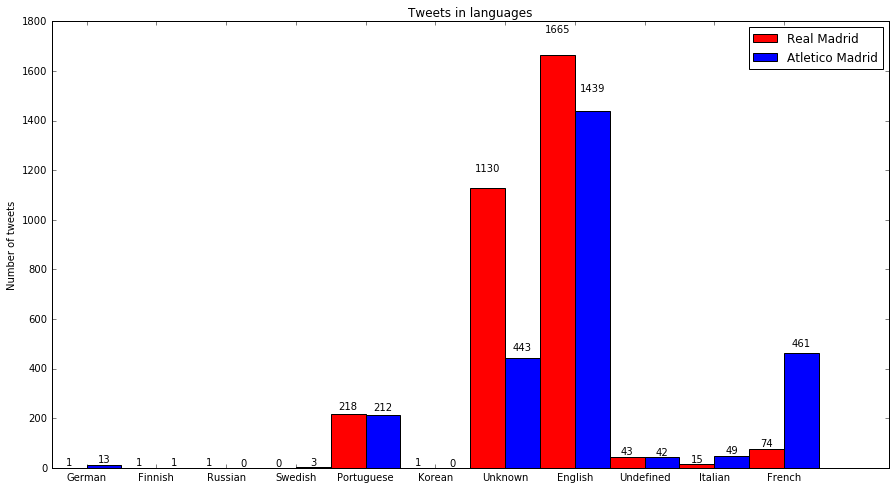

In [54]:
drawGraph(rmdata[:N1], amdata[:N1], langs[:N1], N1)

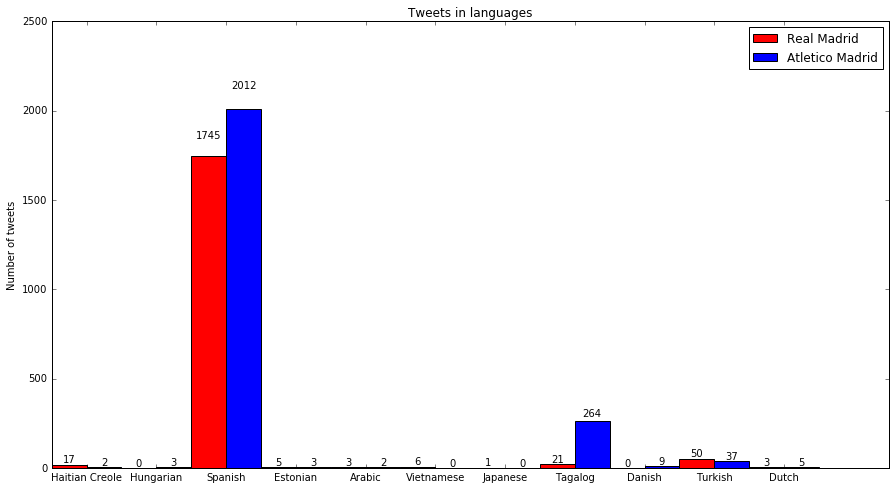

In [56]:
drawGraph(rmdata[N1:], amdata[N1:], langs[N1:], N2)

Видим, что болельщики распределены примерно одинаково. Болеют за испанские команды, конечно же, в основном испанцы, португальцы и бразильцы (португальский). Ну англоговорящих тоже довольно, еще есть язык с кодом "in", отмечен на диаграмме как "Unknown". Среди них "Реал Мадрид" популярнее, как и в целом по миру, если смотреть рейтинги. "Атлетико Мадрид" популярнее в Центральной Европе - в Германии, Франции, Италии и... внезапно на Филиппинах. Тако.